In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
data=pd.read_csv("Crop Production data.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values
data = data.dropna()  # or use data.fillna() for imputation

# Convert categorical columns to numerical
data['State_Name'] = data['State_Name'].astype('category').cat.codes
data['District_Name'] = data['District_Name'].astype('category').cat.codes
data['Season'] = data['Season'].astype('category').cat.codes
data['Crop'] = data['Crop'].astype('category').cat.codes

data.sample(10)

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
150204,Odisha,DEOGARH,2005,Autumn,Groundnut,337.0,291.5
151724,Odisha,GANJAM,2008,Winter,Maize,1.0,0.7
225919,Uttar Pradesh,RAMPUR,2000,Rabi,Urad,14.0,6.0
3121,Andhra Pradesh,GUNTUR,2012,Rabi,Sesamum,1863.0,490.0
171977,Rajasthan,JHALAWAR,2004,Whole Year,Potato,101.0,1266.0
182111,Tamil Nadu,MADURAI,2002,Kharif,Ragi,209.0,312.0
183298,Tamil Nadu,NAMAKKAL,2013,Rabi,Cotton(lint),602.0,1808.0
100220,Kerala,KOZHIKODE,2003,Whole Year,Brinjal,1.0,0.0
119490,Madhya Pradesh,SATNA,2002,Whole Year,Garlic,93.0,204.0
99217,Kerala,KASARAGOD,1998,Whole Year,Banana,727.0,9427.0


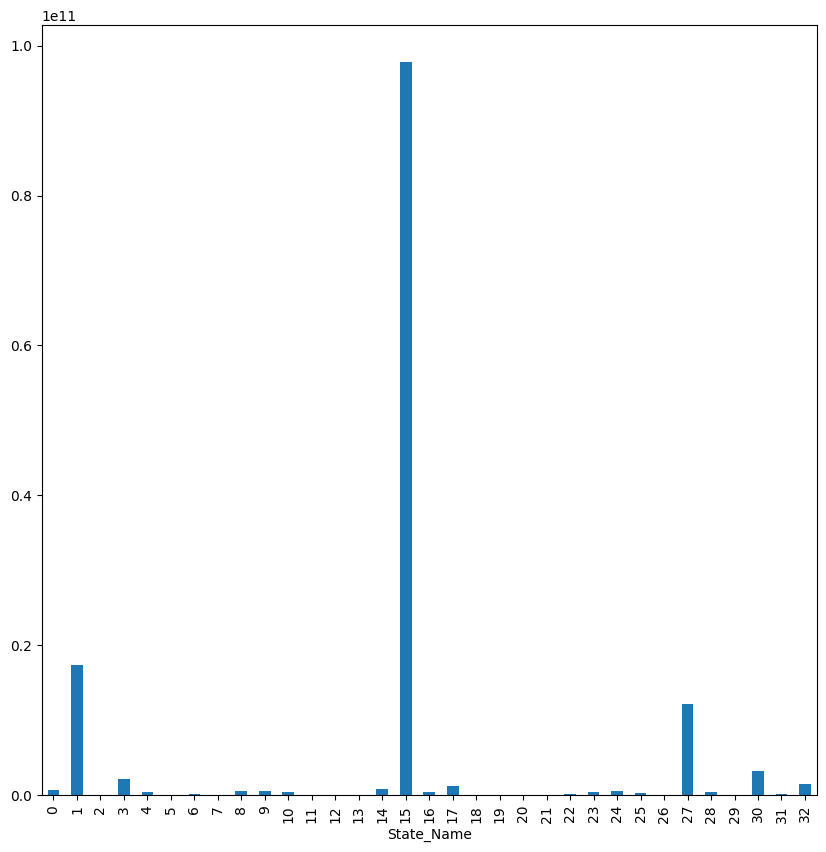

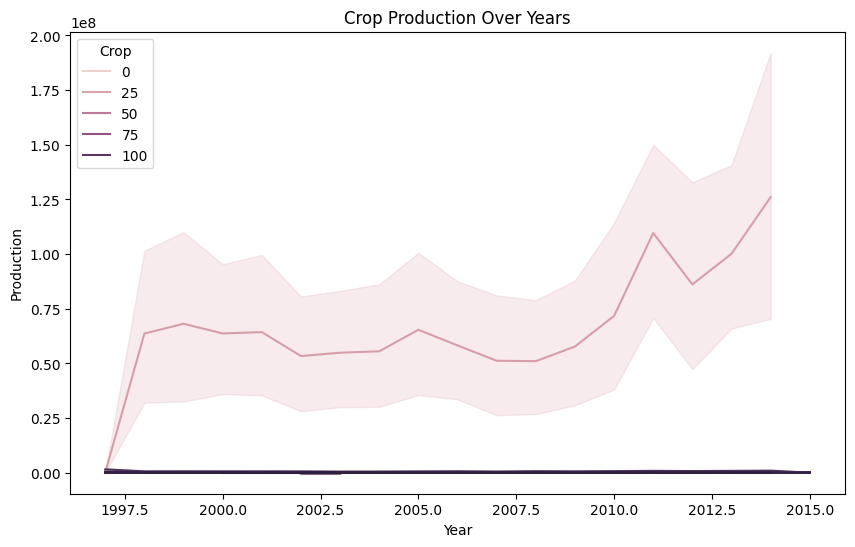

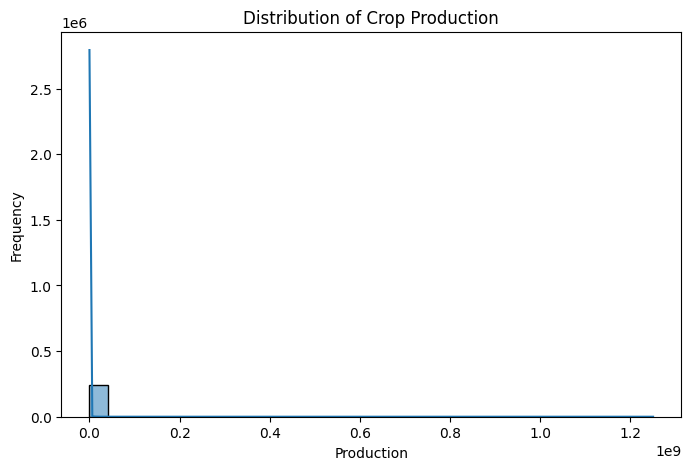

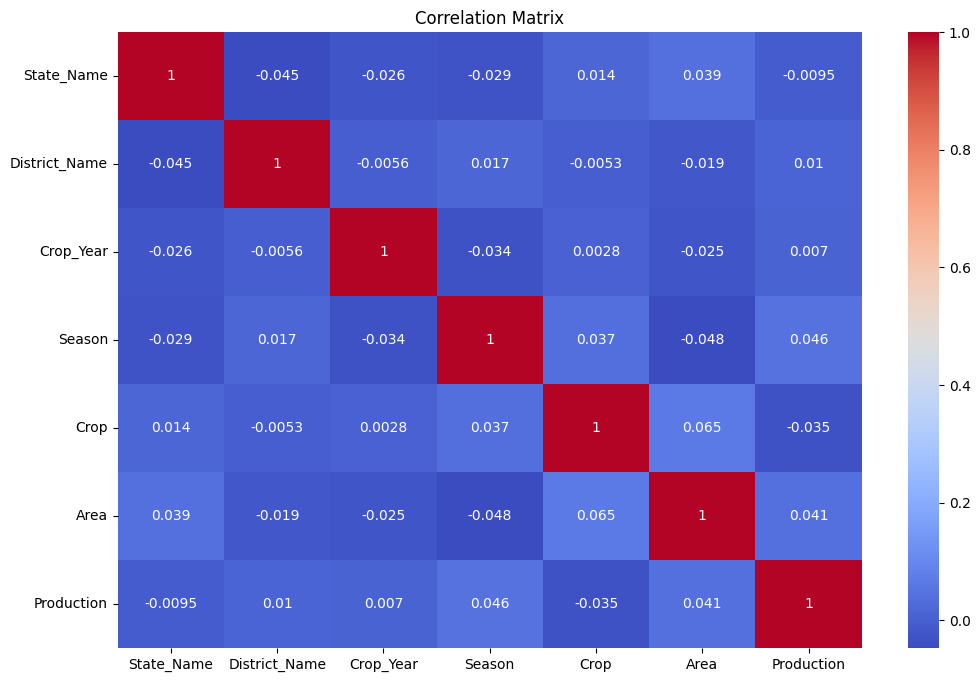

In [22]:
#FIG_1
State_wis=data.groupby(data['State_Name'])["Production"].sum()
State_wis.head(10)
State_wis.plot(kind='bar',figsize=(10,10))
#FIG_2
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Crop_Year', y='Production', hue='Crop')
plt.title('Crop Production Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()
#FIG_3
plt.figure(figsize=(8, 5))
sns.histplot(data['Production'], bins=30, kde=True)
plt.title('Distribution of Crop Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()
#FIG_4
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.show()

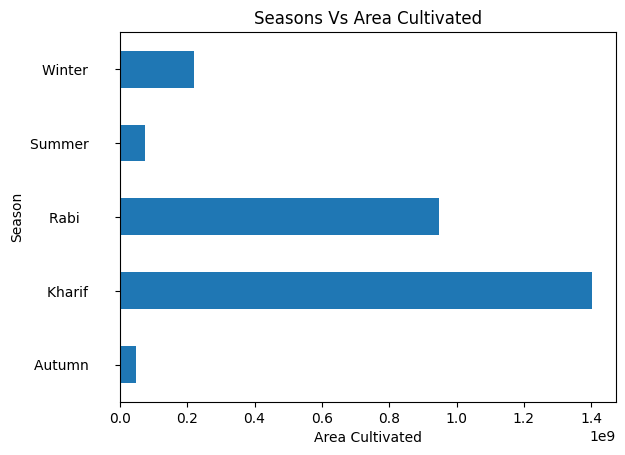

In [28]:
# Area Cultivated by Season
Season_Area=data[['Season','Area']].groupby('Season',as_index=False).sum()
Season_Area=Season_Area[Season_Area['Season'].str.strip() != 'Whole Year']
Season_Area.plot(kind='barh',x='Season',y='Area',legend=False)
plt.ylabel('Season')
plt.xlabel('Area Cultivated')
plt.title('Seasons Vs Area Cultivated')
plt.show()

In [25]:
crops=data[['Crop','Production']].groupby('Crop').sum()
ordered_crops=crops.sort_values(by='Production',ascending=False)
top5_Crops=ordered_crops.iloc[0:5,:]
print('\n\033[1mTop 5 Crops According to Total Production:\033[0m')
top5_Crops



Top 5 Crops According to Total Production:


,Production
Crop,
Coconut,1.299816e+11
Sugarcane,5.535682e+09
Rice,1.605470e+09
Wheat,1.332826e+09
Potato,4.248263e+08


In [26]:
# Plotting Pie chart for Crop vs Area
crops=data[['Crop','Area']].groupby('Crop').sum()
ordered_crops=crops.sort_values(by='Area',ascending=False)
top5_Crops_Area=ordered_crops.iloc[0:5,:]
print('\n\033[1mTop 5 Crops According to Total Area of Cultivation:\
033[0m')
top5_Crops_Area


Top 5 Crops According to Total Area of Cultivation:033


,Area
Crop,
Rice,7.463186e+08
Wheat,4.707132e+08
Cotton(lint),1.565579e+08
Bajra,1.409679e+08
Jowar,1.376593e+08


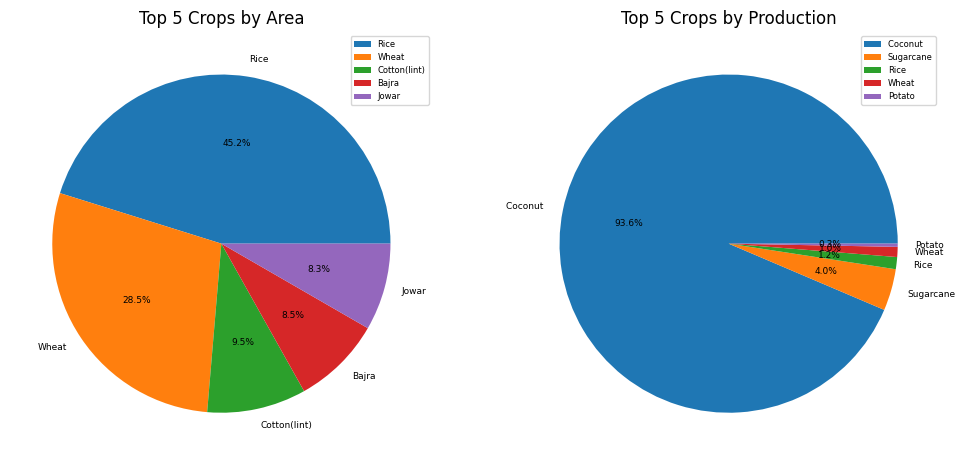

In [27]:
# Plotting Pie charts for Crops vs Production and Crops Vs Area
fig=plt.figure(figsize=(12,20))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
# Plotting Pie chart for Crop vs Area
top5_Crops_Area['Area'].plot(kind='pie',autopct='%1.1f%%',ax=ax1,fontsize=6.5)
ax1.set_ylabel('')
ax1.set_title('Top 5 Crops by Area')
ax1.legend(labels=top5_Crops_Area.index,loc='upper right',fontsize=6)
# Plotting Pie chart for Crop vs Production
top5_Crops['Production'].plot(kind='pie',autopct='%1.1f%%',ax=ax2,fontsize=6.5)
ax2.set_ylabel('')
ax2.set_title('Top 5 Crops by Production')
ax2.legend(labels=top5_Crops.index,loc='upper right',fontsize=6)
plt.show()

In [29]:
# Create new features if necessary
data['Production_per_Area'] = data['Production'] / data['Area']


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data['State_Name'] = data['State_Name'].astype('category').cat.codes
data['District_Name'] = data['District_Name'].astype('category').cat.codes
data['Season'] = data['Season'].astype('category').cat.codes
data['Crop'] = data['Crop'].astype('category').cat.codes


X = data[['Area', 'Crop_Year', 'State_Name', 'District_Name', 'Season', 'Crop']]
y = data['Production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 399775706589348.4
R^2 Score: 0.006368027228819684


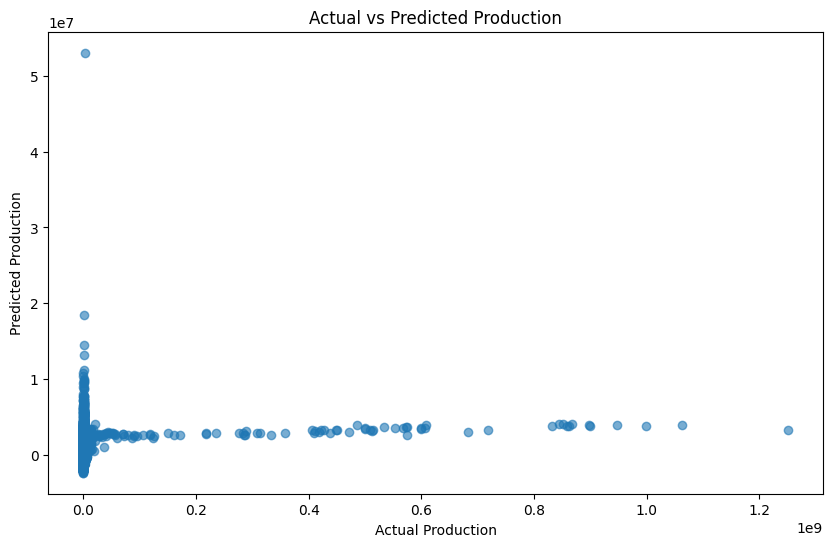

In [33]:
# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Production')
plt.show()

# Save the final dataset
data.to_csv('processed_crop_production_data.csv', index=False)
